<a href="https://colab.research.google.com/github/jc77-7/Revenue-and-Product-Forecating/blob/main/medicals_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
myItems = [1,2,3,4,5,6]
print (myItems)
myItems[3]=100
print(myItems)
myItems[2:5]
myItems[-1:]

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 100, 5, 6]


[6]

In [ ]:
import numpy as np
x = np.array([[7,8],[99,20]],dtype=complex)
x.max()
x.min()

(7+0j)

In [ ]:
import numpy as np
x = np.arange(10).reshape(2,5)
x.cumsum(axis=1)
x[::-1]

array([[5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4]])

In [ ]:
import numpy as np
x = np.array([[3,5,6],[7,8,9],[10,11,12]])
c = np.median(x,1)
c

array([ 5.,  8., 11.])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
date = pd.date_range('20230101', periods=4)
df = pd.DataFrame(np.random.rand(4,4), index=date,columns=list('XYZW'))
df.loc[date[0],'X']

0.7247723205700828

<Figure size 640x480 with 0 Axes>

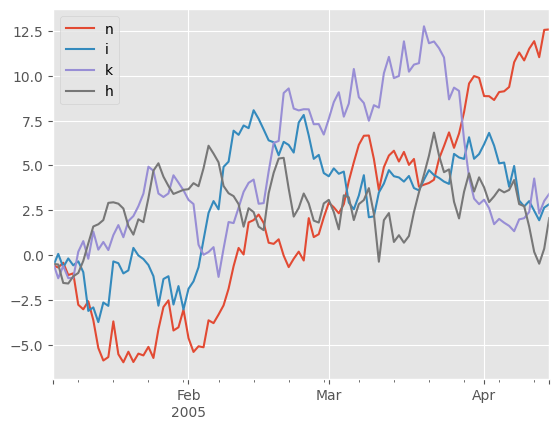

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
t = pd.Series(np.random.randn(100),index=pd.date_range('1/5/2005',periods=100))
d = pd.DataFrame(np.random.randn(100,4),index=t.index,columns=list('nikh'))
d = d.cumsum()
plt.figure(); d.plot(); plt.show()

            item name  Unnamed: 1   exp date    MRP  Qty   Rate  GST   Amount
0             VELOZ-D         NaN 2025-11-01  22.55   30  22.55   12   676.50
1         RABICER DSR         NaN 2002-05-01  15.90   20  15.90   12   318.00
2         RABICER DSR         NaN 2026-07-01  15.90   10  15.90   12   159.00
3    BEPLEX-FORTE TAB         NaN 2026-03-01   2.58   60   2.58   12   154.80
4        OSTEBAN PLUS         NaN 2026-01-01   5.09   20   5.09   12   101.80
5         NUROKIND-LC         NaN 2026-02-01  15.99   15  15.99   12   239.85
6    EPALRRICA- M TAB         NaN 2026-01-01  27.60   20  27.60   12   552.00
7    EPALRRICA- M TAB         NaN 2026-11-01  27.60   10  27.60   12   276.00
8     TELMIKIND-H TAB         NaN 2026-02-01   9.02   30   9.02   12   270.00
9      RAZEL-CV-10/75         NaN 2025-09-01  18.14   20  18.14   12   362.80
10    FENOCOR-67 CAPS         NaN 2026-04-01  14.34   30  14.34   12   430.20
11      LIVOGEN Z TAB         NaN 2026-08-01   6.40   15   6.40 

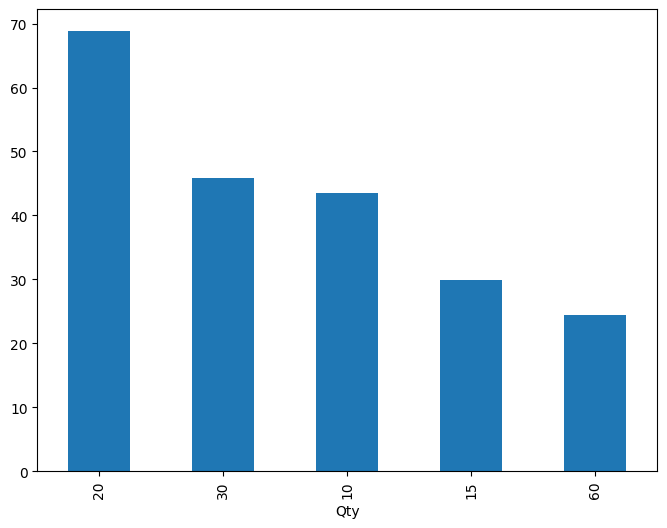

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_medicals = pd.read_excel("/medicals.xlsx")
print(df_medicals)
plt.figure(figsize=(8,6))
item_name = df_medicals.groupby('Qty')['Rate'].sum().sort_values(ascending=False).head(5)
item_name.plot(label=" ",kind='bar')
plt.show()

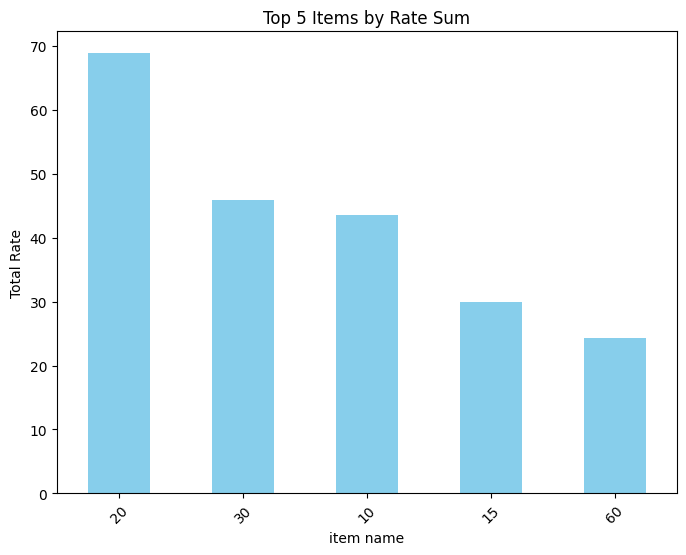

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the file is located in the same directory as the script or notebook
df_medicals = pd.read_excel("/medicals.xlsx")

# Group by 'Qty' (perhaps 'Item Name' or 'Product' should be grouped)
item_name = df_medicals.groupby('Qty')['Rate'].sum().sort_values(ascending=False).head(5)

# Create a bar plot
plt.figure(figsize=(8,6))
item_name.plot(kind='bar', color='skyblue')
plt.title('Top 5 Items by Rate Sum')
plt.xlabel('item name')
plt.ylabel('Total Rate')
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install pandas numpy matplotlib statsmodels prophet

In [ ]:
import pandas as pd

# Assuming your data is in a Excel file
data = pd.read_excel('/medicals.xlsx')
print(data)

            item name  Unnamed: 1   exp date    MRP  Qty   Rate  GST   Amount
0             VELOZ-D         NaN 2025-11-01  22.55   30  22.55   12   676.50
1         RABICER DSR         NaN 2002-05-01  15.90   20  15.90   12   318.00
2         RABICER DSR         NaN 2026-07-01  15.90   10  15.90   12   159.00
3    BEPLEX-FORTE TAB         NaN 2026-03-01   2.58   60   2.58   12   154.80
4        OSTEBAN PLUS         NaN 2026-01-01   5.09   20   5.09   12   101.80
5         NUROKIND-LC         NaN 2026-02-01  15.99   15  15.99   12   239.85
6    EPALRRICA- M TAB         NaN 2026-01-01  27.60   20  27.60   12   552.00
7    EPALRRICA- M TAB         NaN 2026-11-01  27.60   10  27.60   12   276.00
8     TELMIKIND-H TAB         NaN 2026-02-01   9.02   30   9.02   12   270.00
9      RAZEL-CV-10/75         NaN 2025-09-01  18.14   20  18.14   12   362.80
10    FENOCOR-67 CAPS         NaN 2026-04-01  14.34   30  14.34   12   430.20
11      LIVOGEN Z TAB         NaN 2026-08-01   6.40   15   6.40 

In [ ]:
# Handle missing values
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Convert date column to datetime
data['exp date'] = pd.to_datetime(data['exp date'])
print(data['exp date'])

# Group by medication and aggregate sales
sales_data = data.groupby('item name')['Qty'].sum().reset_index()
print(sales_data)

0    2025-11-01
1    2002-05-01
2    2026-07-01
3    2026-03-01
4    2026-01-01
5    2026-02-01
6    2026-01-01
7    2026-11-01
8    2026-02-01
9    2025-09-01
10   2026-04-01
11   2026-08-01
12   2026-08-01
13   2026-12-01
14   2025-12-01
15   2024-08-01
16   2026-08-01
17   2002-05-01
Name: exp date, dtype: datetime64[ns]
            item name  Qty
0    BEPLEX-FORTE TAB   60
1    EPALRRICA- M TAB   30
2         ERITEL 40MG   15
3     FENOCOR-67 CAPS   30
4   ISTAMET D XR 500M   28
5       LIVOGEN Z TAB   15
6         MONTNEST LC    4
7         NUROKIND-LC   15
8     OKACET 10MG TAB   20
9        OSTEBAN PLUS   20
10        RABICER DSR   30
11     RAZEL-CV-10/75   20
12    TELMIKIND-H TAB   30
13   TRIVOLIB 2MG TAB   60
14            VELOZ-D   30
15        ZOLSOMA 5MG   50


<ipython-input-9-caaa803084fb>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values


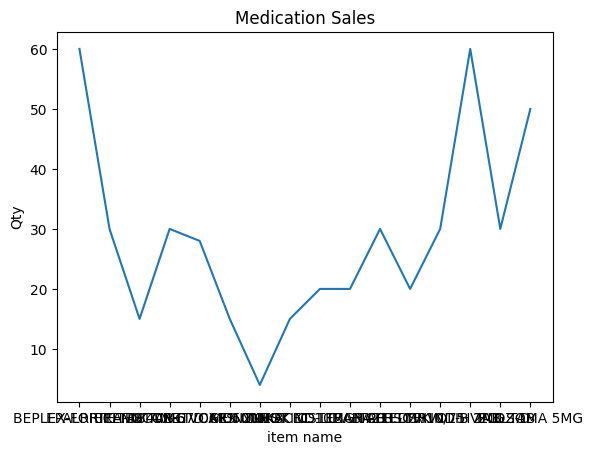

In [ ]:
import matplotlib.pyplot as plt

# Plot time series
plt.plot(sales_data['item name'], sales_data['Qty'])
plt.xlabel('item name')
plt.ylabel('Qty')
plt.title('Medication Sales')
plt.show()

In [ ]:
print(sales_data.columns)


Index(['item name', 'Qty'], dtype='object')


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define p, d, q
p = 2  # Adjust this value based on your data
d = 1  # Adjust this value based on your data
q = 2  # Adjust this value based on your data

# Train ARIMA model
model = ARIMA(sales_data['Qty'], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    Qty   No. Observations:                   16
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -61.476
Date:                Sat, 12 Oct 2024   AIC                            132.953
Time:                        06:45:49   BIC                            136.493
Sample:                             0   HQIC                           132.915
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0025      0.556     -1.803      0.071      -2.092       0.087
ar.L2         -0.7019      0.585     -1.199      0.230      -1.849       0.445
ma.L1          0.7558      0.985      0.768      0.4

In [ ]:
# Make predictions
predictions = model_fit.forecast(steps=10)
print(predictions)

16    66.551573
17    35.331361
18    55.012781
19    57.194715
20    41.193354
21    55.703440
22    52.387920
23    45.527459
24    54.732234
25    50.319552
Name: predicted_mean, dtype: float64


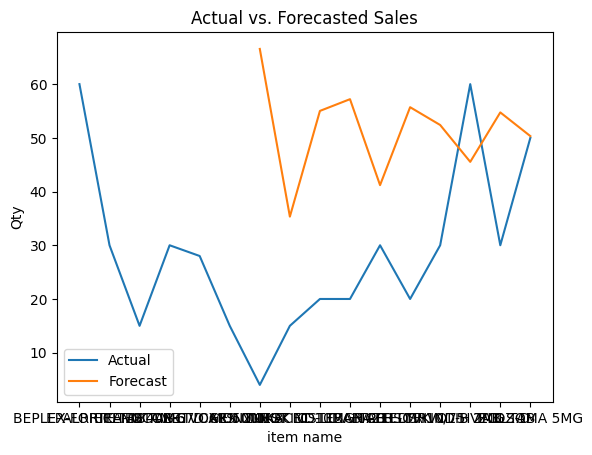

In [ ]:
plt.plot(sales_data['item name'], sales_data['Qty'], label='Actual')
plt.plot(sales_data['item name'][len(sales_data) - len(predictions):], predictions, label='Forecast')
plt.xlabel('item name')
plt.ylabel('Qty')
plt.title('Actual vs. Forecasted Sales')
plt.legend()
plt.show()